In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('housing.csv')
#from sklearn.datasets import load_boston

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\accounts\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


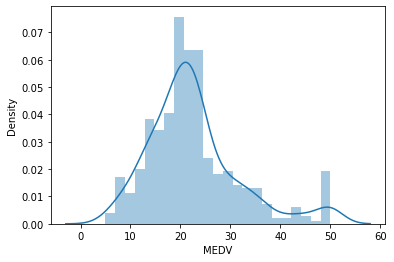

In [6]:
#Distribution of Variable MEDV-Distributed Normally with few Outliers
sns.distplot(df['MEDV'])
plt.show()

<AxesSubplot:>

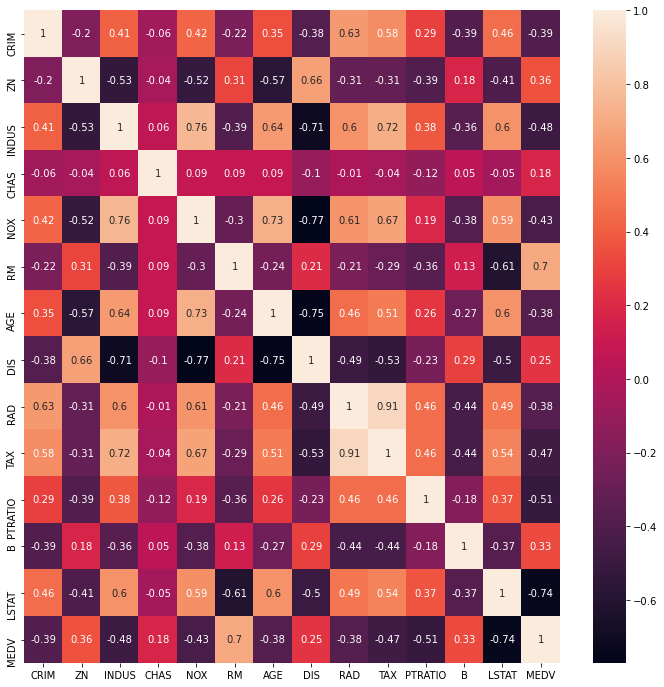

In [7]:
#Correlation Matrix
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True)

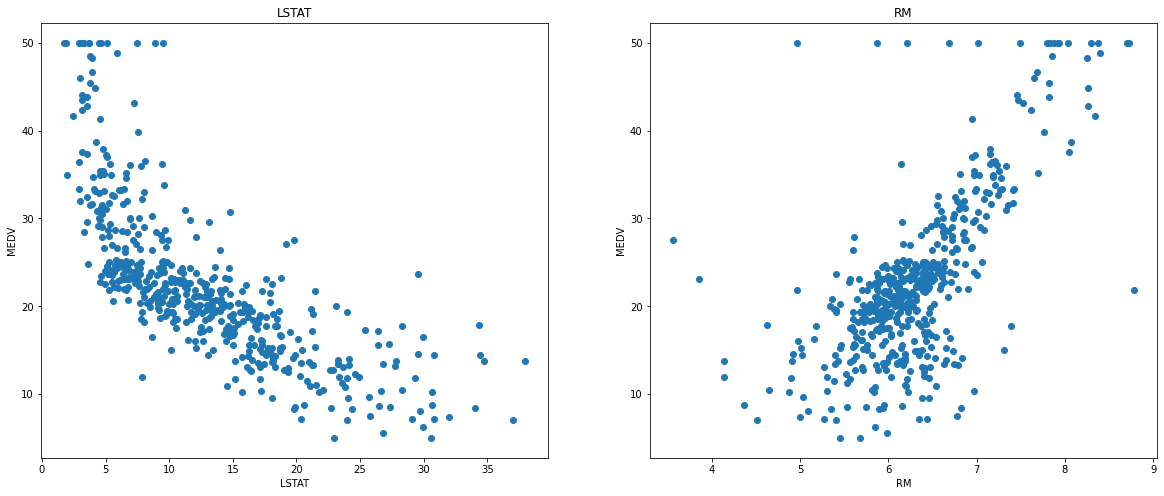

In [8]:
#Plotting ScatterPlot
plt.figure(figsize=(20, 8))
features=['LSTAT','RM']
target=df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [9]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'],df['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = df['MEDV']

In [10]:
#Splitting The dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=85)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [11]:
#fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
#Evaluating Model
train_prediction=model.predict(X_train)
train_mse=(mean_squared_error(Y_train,train_prediction))
r2_train=r2_score(Y_train,train_prediction)

In [13]:
print("The model performance for training set :")
print('MSE is {}'.format(train_mse))
print('R2 score is {}'.format(r2_train))

The model performance for training set :
MSE is 30.03450704625394
R2 score is 0.646059992132229


In [14]:
test_prediction=model.predict(X_test)
test_mse=(mean_squared_error(Y_test,test_prediction))
r2_test=r2_score(Y_test,test_prediction)

In [15]:
print("The model performance for testing set :")
print('MSE is {}'.format(test_mse))
print('R2 score is {}'.format(r2_test))

The model performance for testing set :
MSE is 16.005282208175245
R2 score is 0.8064293995761354


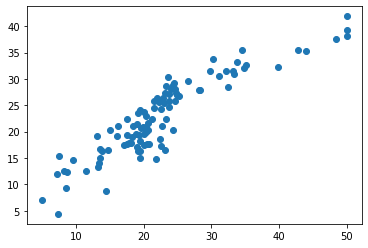

In [16]:
plt.scatter(Y_test,test_prediction)
plt.show()

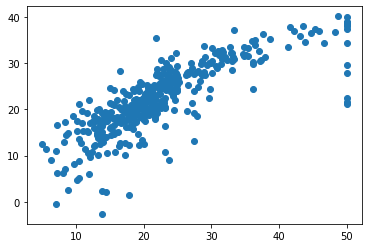

In [20]:
#visualizing Actual VS Predicted Price
plt.scatter(Y_train,train_prediction)
plt.show()

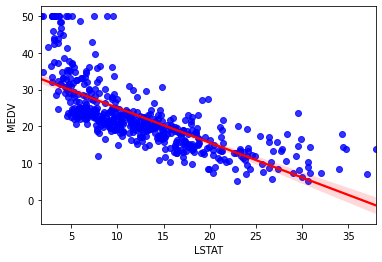

In [17]:
sns.regplot(x="LSTAT",y=Y,data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.show()

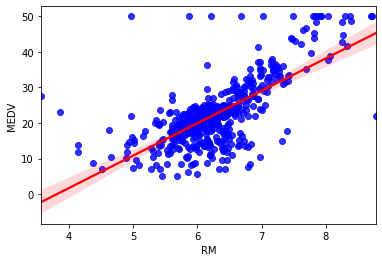

In [18]:
sns.regplot(x="RM",y=Y,data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.show()

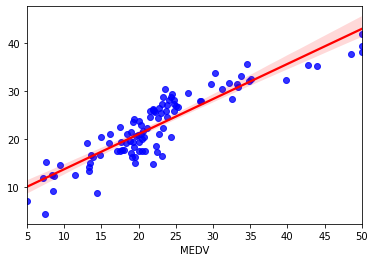

In [19]:
sns.regplot(x=Y_test,y=test_prediction,data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.show()